<a href="https://colab.research.google.com/github/xiaochengJF/MachineLearning/blob/master/PCA%E9%99%8D%E7%BB%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [0]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [0]:
class PCA():
    def calculate_covariance_matrix(self, X, Y=None):
        # 计算协方差矩阵

        m = X.shape[0]
        X = X - np.mean(X, axis=0)
        Y = X if Y == None else Y - np.mean(Y, axis=0)
        return 1 / m * np.matmul(X.T, Y)

    def transform(self, X, n_components):
        # 设n=X.shape[1]，将n维数据降维成n_component维

        covariance_matrix = self.calculate_covariance_matrix(X)

        # 获取特征值，和特征向量
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # 对特征向量排序，并取最大的前n_component组
        idx = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, idx]
        eigenvectors = eigenvectors[:, :n_components]

        # 转换
        return np.matmul(X, eigenvectors)

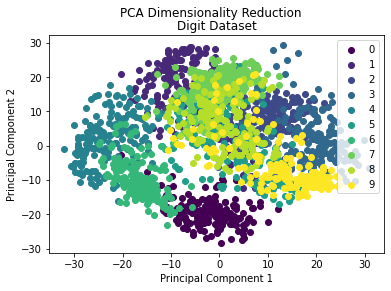

In [1]:
#主函数
def main():

    # Demo of how to reduce the dimensionality of the data to two dimension
    # and plot the results.

    # Load the dataset
    data = datasets.load_digits()
    X = data.data
    y = data.target

    # Project the data onto the 2 primary principal components
    X_trans = PCA().transform(X, 2)

    x1 = X_trans[:, 0]
    x2 = X_trans[:, 1]

    cmap = plt.get_cmap('viridis')
    colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

    class_distr = []
    # Plot the different class distributions
    for i, l in enumerate(np.unique(y)):
        _x1 = x1[y == l]
        _x2 = x2[y == l]
        _y = y[y == l]
        class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

    # Add a legend
    plt.legend(class_distr, y, loc=1)

    # Axis labels
    plt.suptitle("PCA Dimensionality Reduction")
    plt.title("Digit Dataset")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


if __name__ == "__main__":
    main()